In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('50_Startups.csv')

# Quick look at the data
print(df.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


 Summary Statistics


In [3]:
# Check for missing values and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [4]:
# Summary statistics for numerical columns
print(df.describe())


           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [5]:
# Summary statistics for categorical columns
print(df.describe(include='object'))

           State
count         50
unique         3
top     New York
freq          17


Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


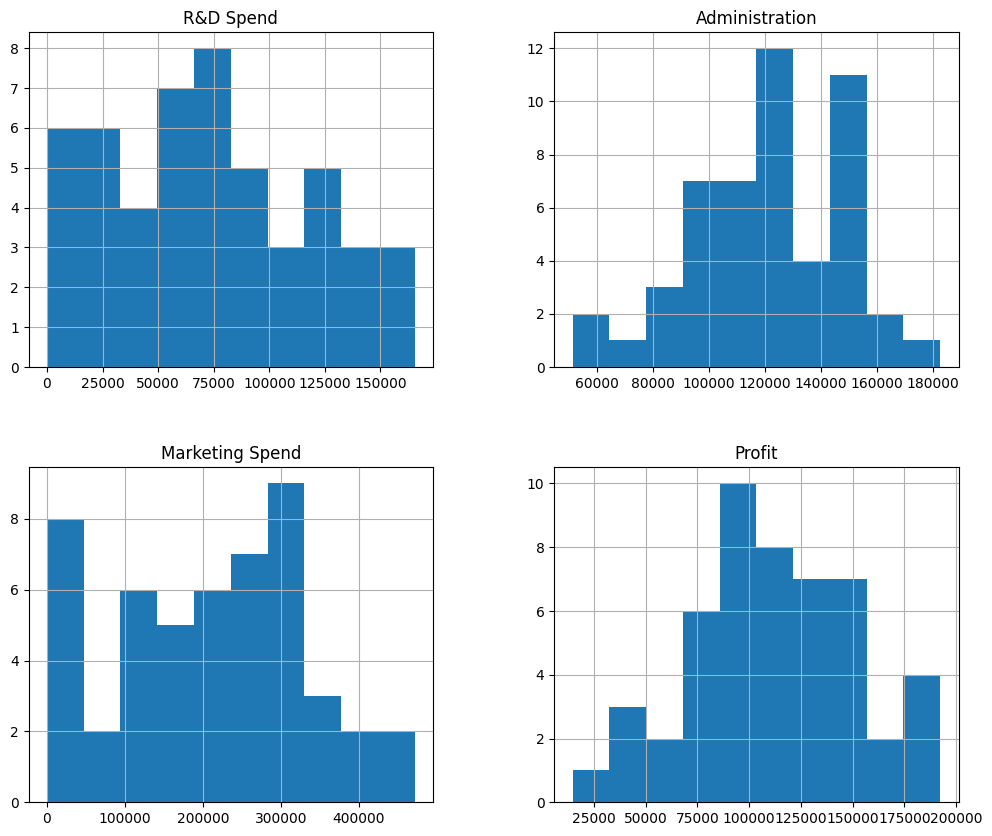

In [7]:
# Histogram for numerical columns
df.hist(figsize=(12, 10))
plt.show()

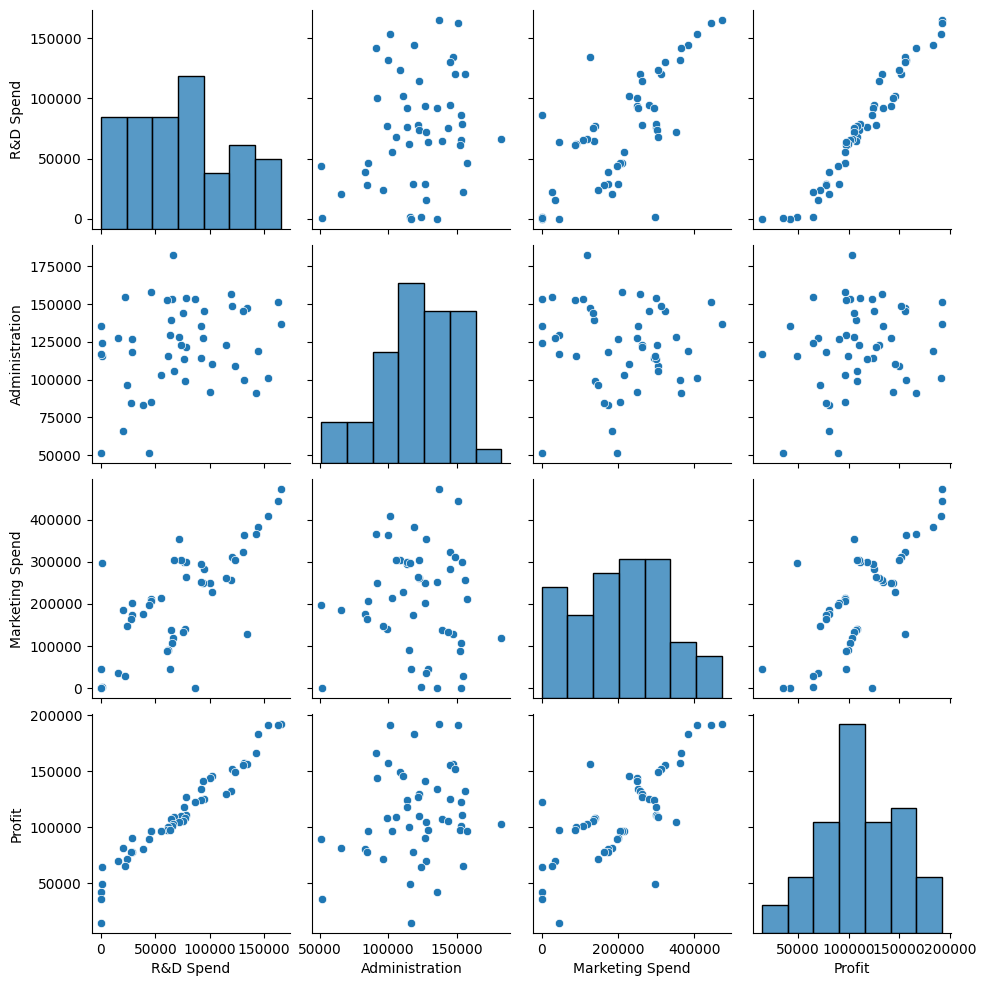

In [8]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

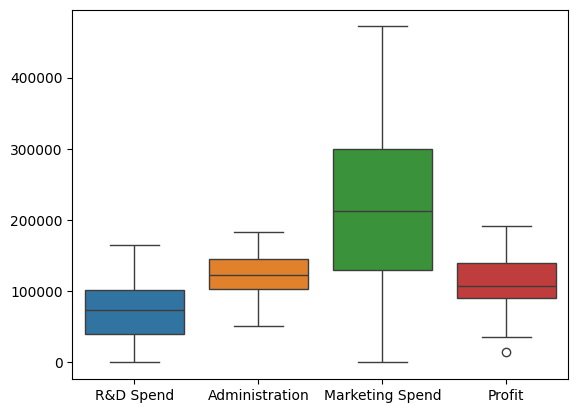

In [9]:
# Boxplot to check for outliers
sns.boxplot(data=df)
plt.show()

Correlation Analysis

In [13]:
# Correlation matrix
# Correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()


df = pd.get_dummies(df, columns=['State'], drop_first=True)
correlation_matrix = df.corr()



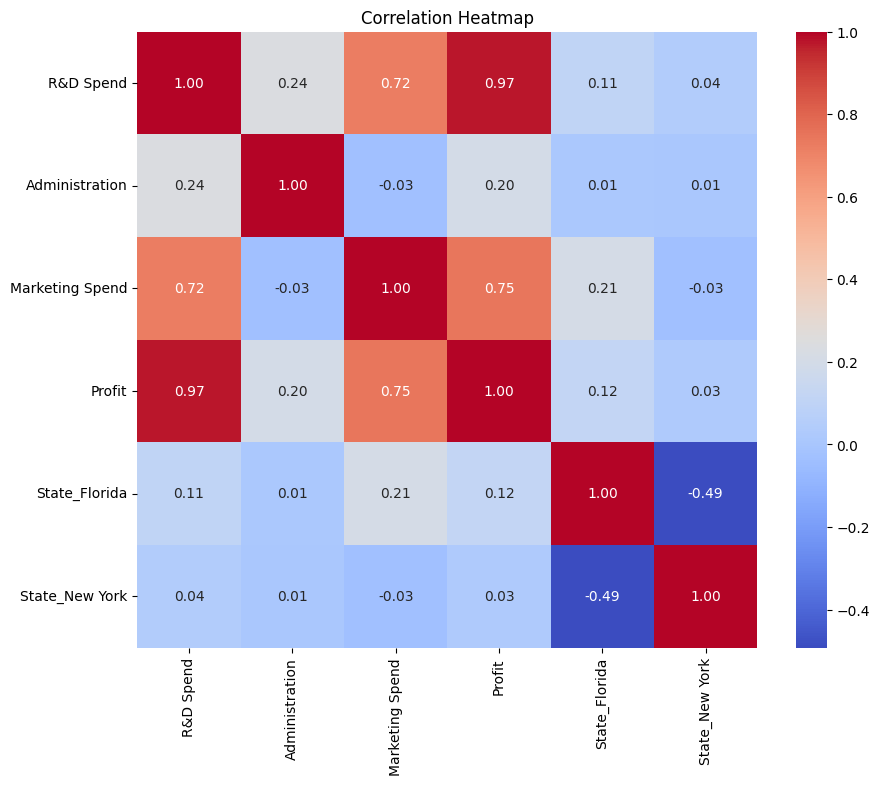

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Check for missing values
print(df.isnull().sum())

# Filling missing values (example: filling with mean for 'R&D Spend')
df['R&D Spend'].fillna(df['R&D Spend'].mean(), inplace=True)

# Dropping rows with missing values
df.dropna(inplace=True)


R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State_Florida      0
State_New York     0
dtype: int64


<ipython-input-16-a3efc0ae4d2f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['R&D Spend'].fillna(df['R&D Spend'].mean(), inplace=True)
